Diego Lozoya Morales | 745345

02/10/23

# TAREA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Integración Montecarlo

1. Realizar las siguientes integrales. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.

$\int_{1}^{3} e^{x}\log(x)\text{d}x$

$ \int_1^3 \sin(x)\ln(x) \text{d}x $

In [ ]:
def f(x):
    return np.exp(x) * np.log10(x)

def g(x):
    return np.sin(x) * np.log(x)

a = 1
b = 3
N = np.logspace(1, 5, 5)

table = pd.DataFrame(columns=["Función 1", "Error f1", "Función 2", "Error f2"], index=N)

def montecarlo1(f, N, a, b):
    u = np.random.uniform(a, b, N)
    media = np.mean(f(u))
    return media * (b-a)

def montecarlo2(g, N, a, b):
    u = np.random.uniform(a, b, N)
    media = np.mean(g(u))
    return media * (b-a)

for i in N:
    aproximacion1 = montecarlo1(f, int(i), 1, 3)
    aproximacion2 = montecarlo2(g, int(i), 1, 3)
    table.loc[i, "Función 1"] = aproximacion1
    table.loc[i, "Error f1"] = abs(6.092067119 - aproximacion1)
    table.loc[i, "Función 2"] = aproximacion2
    table.loc[i, "Error f2"] = abs(0.8698437856 - aproximacion2)

table

,Función 1,Error f1,Función 2,Error f2
10.0,5.209158,0.882909,0.997038,0.127195
100.0,6.082988,0.009079,0.884167,0.014323
1000.0,6.294468,0.202401,0.872946,0.003102
10000.0,6.204021,0.111954,0.877201,0.007357
100000.0,6.074012,0.018055,0.87143,0.001586


2. Aproximar el área de la región descrita por

$$x^2+2y^2\leq-2x+8y-7$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y en las columnas el valor de aproximación y el error relativo.

Definir unos límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$, para la región $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$

In [ ]:
N = np.logspace(1, 5, 5)

table = pd.DataFrame(columns=["Aproximación", "Error relativo"], index=N)

def area(x, y):
    return (x**2 + 2*y**2) <= (-2*x + 8*y - 7)

def montecarlo2(region, xa, xb, ya, yb, N):
        x = np.random.uniform(xa, xb, N)
        y = np.random.uniform(ya, yb, N)
        B = region(x, y)
        AR = (xb - xa)*(yb - ya)
        return np.mean(B)*AR

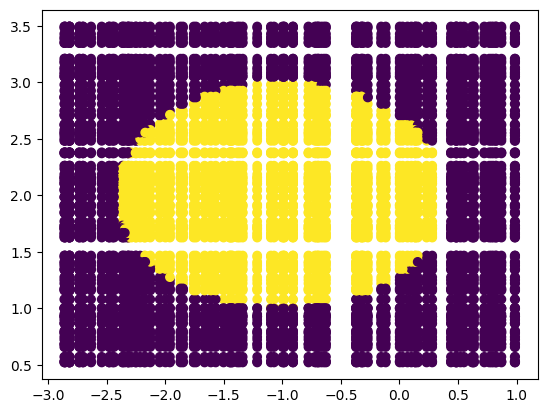

In [ ]:
x = np.random.uniform(-3, 1, 100)
y = np.random.uniform(0.5, 3.5, 100)

X, Y = np.meshgrid(x, y)

plt.figure()
plt.scatter(X, Y, c = area(X, Y))

In [ ]:
for i in N:
    AD = montecarlo2(area, -2.5, 0.5, 1, 3, int(i))
    AR = (0.5 - (-2.5))*(3 - 1)
    C_rel = ((1 - (AD / AR)) / (AD / AR))**(1/2)
    error_relativo = np.log10(C_rel) - (1/2)*np.log10(int(i))
    table.loc[i, "Aproximación"] = AD
    table.loc[i, "Error relativo"] = error_relativo

table

,Aproximación,Error relativo
10.0,4.2,-0.683988
100.0,4.02,-1.15378
1000.0,4.464,-1.731666
10000.0,4.3998,-2.219629
100000.0,4.46352,-2.731575


Patera, AT; Yano, M (2014) MIT OPEN COURSEWARE, https://ocw.mit.edu/courses/2-086-numerical-computation-for-mechanical-engineers-fall-2014/resources/mit2_086f14_monte_carlo/

3. Describe 3 casos de uso de integración Montecarlo en tu ingeniería.

+ Valuación a futuro de activos subyacentes en opciones. Sirve para valuar las opciones en situaciones donde se tienen que tomar varios factores en consideración, donde no se pueden utilizar fórmulas analíticas.

    Ibarra, Victor; Saavedra, Patricia (2018) Self Bank, http://mat.izt.uam.mx/mat/documentos/notas%20de%20clase/cfenaoe3.pdf

+ Valuación de riesgo en portafolios de inversión. Utilizado simulando multiples trayectorias de posibles precios de los activos que conforman el portafolio. Sirve para la toma de decisiones en cuanto a los activos a seleccionar, dependiendo del riesgo que el cliente está dispuesto a tomar.

    Estruga, Nurgia (2021) EALDE, https://www.ealde.es/simulacion-montecarlo-gestion-de-riesgos-direccion-de-proyectos/#:~:text=El%20an%C3%A1lisis%20de%20riesgos%20con,para%20poder%20valorar%20una%20inversi%C3%B3n.

+ Valuación de activos complejos, tales como bonos convertibles, seguros o productos estructurados, los cuales requieren de multiples factores a ser considerados, con lo cual resulta mucho más sencillo una valuación con el método montecarlo.

    Negocios y Empresa (2023) https://negociosyempresa.com/que-es-metodo-montecarlo/